In [76]:
import requests
import json

def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    with open("eq_store.json", 'w') as f:
        f.write(text)

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    eq_struct = json.loads(text)
    return eq_struct


In [87]:
get_data()

{'type': 'FeatureCollection',
 'metadata': {'generated': 1698312282000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2018-10-11&orderby=time-asc',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.14.0',
  'count': 120},
 'features': [{'type': 'Feature',
   'properties': {'mag': 2.6,
    'place': '12 km NNW of Penrith, United Kingdom',
    'time': 956553055700,
    'updated': 1415322596133,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 104,
    'net': 'us',
    'code': 'p0009rst',
    'ids': ',usp0009rst,',
    'sources': ',us,',
    'types': ',impact-text,origin,phase-d

In [78]:
def load_data():
    with open("eq_store.json", 'r') as f:
        text = f.read()
    eq_struct = json.loads(text)
    return eq_struct

In [79]:
db = load_data()
db

{'type': 'FeatureCollection',
 'metadata': {'generated': 1698312282000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2018-10-11&orderby=time-asc',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.14.0',
  'count': 120},
 'features': [{'type': 'Feature',
   'properties': {'mag': 2.6,
    'place': '12 km NNW of Penrith, United Kingdom',
    'time': 956553055700,
    'updated': 1415322596133,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp0009rst',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp0009rst&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 104,
    'net': 'us',
    'code': 'p0009rst',
    'ids': ',usp0009rst,',
    'sources': ',us,',
    'types': ',impact-text,origin,phase-d

In [80]:
def count_earthquakes(db=db):
    """Get the total number of earthquakes in the response."""
    
    return db['metadata']['count']

In [81]:
count_earthquakes(db)

120

In [82]:
def get_magnitude(eq, db=db):
    """Retrive the magnitude of an earthquake item."""
    
    return db['features'][eq]['properties']['mag']

In [83]:
get_magnitude(9)

3.5

In [84]:
def get_location(eq, db=db):
    """Retrieve the latitude and longitude of an earthquake item."""
    
    lat,long = db['features'][eq]['geometry']['coordinates'][0:2]
    return {'coordinates':{'latitude':lat,'longitude':long}}



In [85]:
get_location(1)

{'coordinates': {'latitude': -1.61, 'longitude': 52.28}}

In [86]:
def get_maximum(db=db):
    """Get the magnitude and location of the strongest earthquake in the data."""
    
    max_mag = 0
    max_index = 0
    for eq in range(count_earthquakes()):
        if get_magnitude(eq) > max_mag:
            max_mag = get_magnitude(eq)
            max_index = eq
        elif get_magnitude(eq) == max_mag:
            max_index = [max_index]
            max_index.append(eq)
    if type(max_index) == 
    return max_mag, get_location(max_index)['coordinates']

SyntaxError: invalid syntax (1567418150.py, line 13)

In [ ]:
max_index=[]
type(max_index)

list

In [ ]:
get_maximum()

TypeError: list indices must be integers or slices, not list

In [ ]:
# With all the above functions defined, we can now call them and get the result
data = get_data()
print(f"Loaded {count_earthquakes(data)}")
max_magnitude, max_location = get_maximum(data)
print(f"The strongest earthquake was at {max_location} with magnitude {max_magnitude}")

Loaded 120


TypeError: list indices must be integers or slices, not list

In [92]:
from datetime import datetime
ts = int('956553055700')/1000
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2000-04-24 05:10:55


In [93]:
from datetime import datetime

In [110]:
dates = []
for eq in  db['features']:
    dates.append(int(datetime.utcfromtimestamp(eq['properties']['time']/1000).strftime('%Y')))

In [114]:
from collections import Counter

counts = dict(Counter(dates))
counts

<function dict.keys>

Text(0.5, 15.0, 'Time / year')

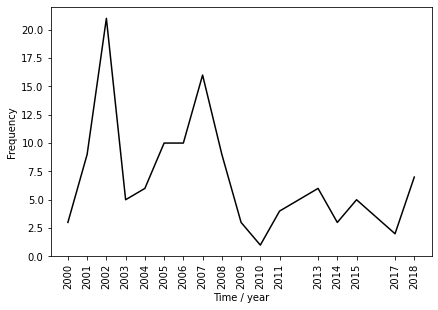

In [135]:
import matplotlib.pyplot as plt

plt.plot(counts.keys(), counts.values(), "-k")
plt.xticks(list(counts.keys()))
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim(0,)
plt.ylabel('Frequency')
plt.xlabel('Time / year')